In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape


(2290, 6)

In [6]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
correlation=gold_data.corr()

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

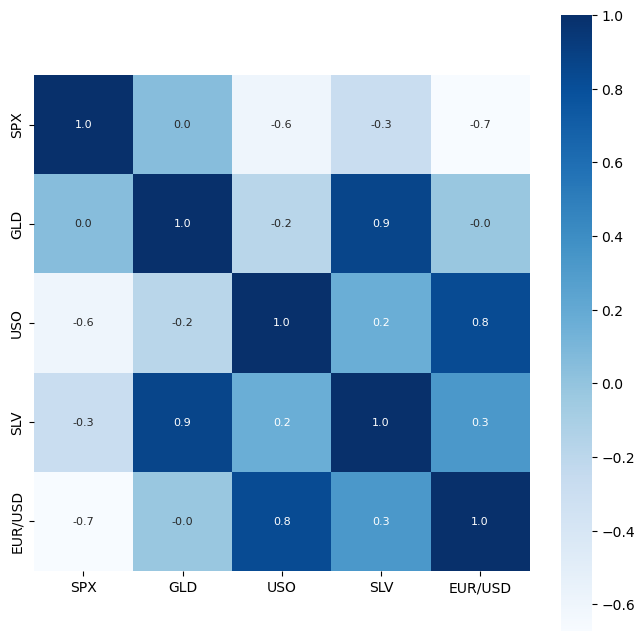

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
#corre;ation value

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [16]:
# checking distribution of gold price

C:\Users\MUSTAFA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

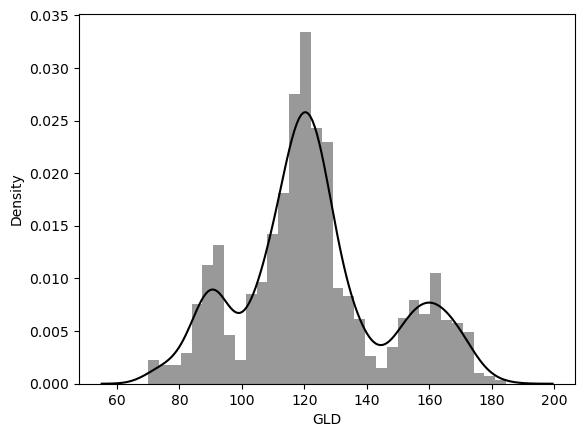

In [19]:
sns.distplot(gold_data['GLD'],color='black')

In [20]:
# splittin features and taget

In [21]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
#splitting into training and test data

In [25]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
#Model Training 
#Using Random Forest Model

In [28]:
regressor=RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [30]:
test_data_prediction=regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.31669908  82.08109986 116.05960019 127.43420081 120.63750134
 154.61009793 150.26079754 126.04460021 117.64859868 126.11700002
 116.76510057 171.96290118 141.8472988  167.6788987  115.1286005
 117.88460046 138.21010347 170.05850046 159.5364028  158.03779899
 155.04560006 125.22450042 176.18489986 156.98480288 125.28550038
  93.93370011  76.58440062 120.8286001  118.97869886 167.50359991
  88.09010021 125.16379945  91.08610069 117.78089985 121.15209938
 136.49870013 115.54350152 115.06670085 148.55599974 106.95680101
 104.54600236  87.25299786 126.5000007  117.8939001  151.7317989
 119.8950998  108.42549967 107.83799798  93.07380038 127.19059759
  75.17470046 113.62789947 121.04280025 111.25309956 118.73219877
 120.60959923 159.25000115 166.64770079 147.11589658  85.58319852
  94.31590049  86.81139918  90.41370012 118.89220067 126.41960084
 127.58249954 169.47940007 122.21959938 117.20309908  98.38120008
 168.16000187 142.91809815 132.12220276 121.292602   121.17859923
 119.9227006

In [32]:
# R square error

In [35]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.9886360654759386


In [36]:
#compare actual and predicted values in graph

In [37]:
Y_test=list(Y_test)


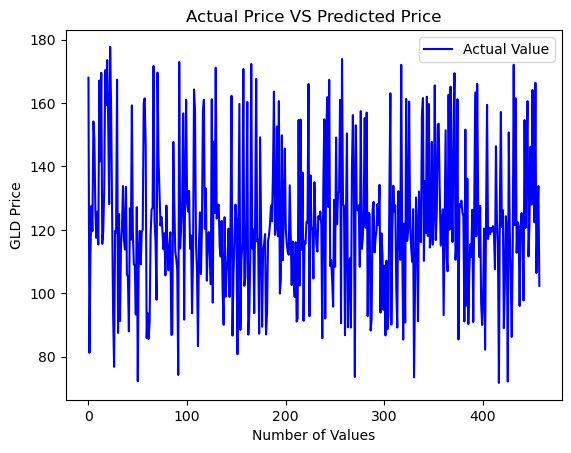

In [41]:
plt.plot(Y_test,color='Blue',label='Actual Value')
#plt.plot(test_data_prediction,color='Green',label='Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


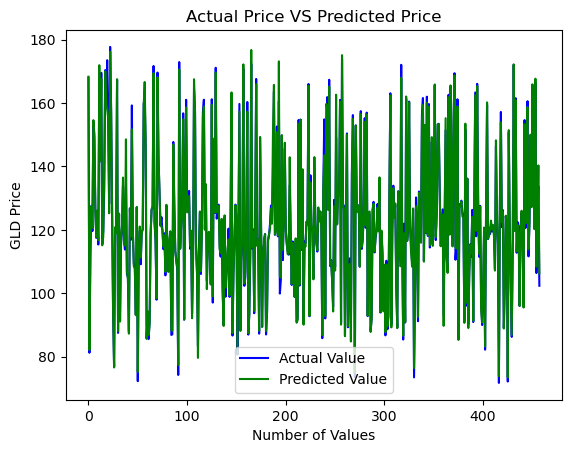

In [40]:
plt.plot(Y_test,color='Blue',label='Actual Value')
plt.plot(test_data_prediction,color='Green',label='Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
